# NLP Analysis of NFL Prospect Reports

In [1]:
# Basic Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scattertext as st

In [2]:
# Create a DataFrame from the player_bios.csv file
df = pd.read_csv('data/player_bios.csv')

df

,Player,Player Bio,Player Grades,Link
0,Jadeveon Clowney,A physical specimen with a rare size-speed com...,7.50,https://www.nfl.com/prospects/jadeveon-clowney...
1,Sammy Watkins,A legitimate No. 1-caliber receiver who steppe...,7.10,https://www.nfl.com/prospects/sammy-watkins/32...
2,Anthony Barr,"A highly disruptive, athletic specimen with th...",7.00,https://www.nfl.com/prospects/anthony-barr/320...
3,Khalil Mack,A havoc-wreaking rush linebacker with the burs...,7.00,https://www.nfl.com/prospects/khalil-mack/3200...
4,Jake Matthews,"Smart, tough, versatile franchise left tackle ...",7.00,https://www.nfl.com/prospects/jake-matthews/32...
...,...,...,...,...
3964,Jeremy Webb,Webb is a Florida product but helped Stevenson...,5.50,https://www.nfl.com/prospects/jeremy-webb/3200...
3965,Russ Yeast,"Russ is the son of Craig Yeast, who was the SE...",5.50,https://www.nfl.com/prospects/russ-yeast/32005...
3966,Ken Marks,"Marks was known as ""Grandpa"" on the field as a...",5.49,https://www.nfl.com/prospects/ken-marks/32004d...
3967,Devin Wynn,Wynn was coached by former Georgia and NFL run...,5.46,https://www.nfl.com/prospects/devin-wynn/32005...


<Figure size 720x432 with 0 Axes>

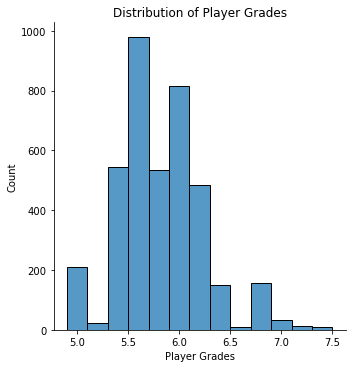

<Figure size 432x288 with 0 Axes>

In [3]:
# Create a bar chart to show the distribution of the grades
plt.figure(figsize=(10, 6))
sns.displot(df['Player Grades'], bins=13, kde=False)
plt.title('Distribution of Player Grades')
plt.xlabel('Player Grades')
plt.ylabel('Count')
plt.show()

# Save the bar chart to the images folder
plt.savefig('images/grade_distribution.png')

In [5]:
# Create a new column called player category that classifies players based on the NFL.com player grades
df['Player Category'] = pd.cut(df['Player Grades'],
                               bins=[0, 5.59, 5.69, 5.99, 6.09, 6.19,
                                     6.29, 6.39, 6.49, 6.6, 6.9, 7.1, 7.5, 8],
                               labels=['Priority Undrafted Free Agent',
                                       'Candidate for Bottom of Roster or Practice Squad',
                                       'Average Backup or Special Teamer',
                                       'Traits or Talents to be Above-Average Backup',
                                       'Good Backup with Potential to Develop into Starter',
                                       'Will Eventually be Average Starter',
                                       'Will Eventually be Plus Starter',
                                       'Will become good starter within two years',
                                       'Boom or Bust Potential',
                                       'Year One Starter',
                                       'Pro Bowl Talent',
                                       'Perennial All-Pro',
                                       'The Perfect Prospect'])

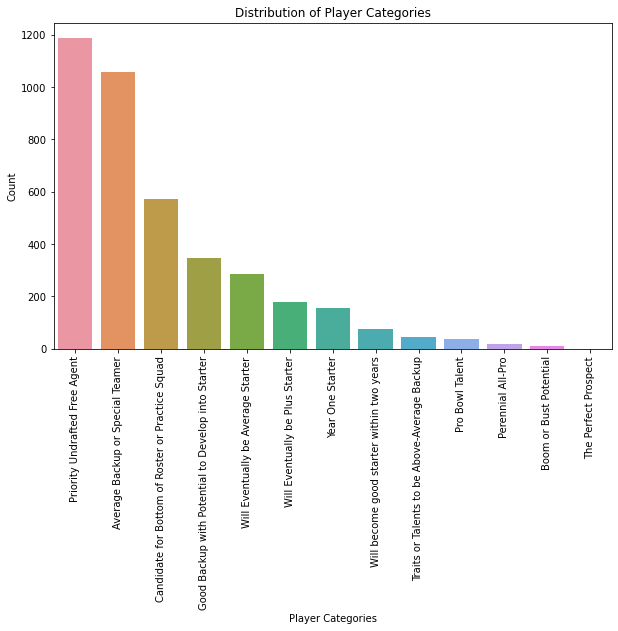

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a bar chart to show the distribution of the player categorie and order the bars by the count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Player Category', order=df['Player Category'].value_counts().index)
plt.title('Distribution of Player Categories')
plt.xlabel('Player Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Save the bar chart to the images folder
plt.savefig('images/player_category_distribution.png')

In [7]:
# Create a copy DataFrame to manipulate for scattertext visualization
df_scatter = df.copy()

In [13]:
# Plot the player bios using scattertext
corpus = st.CorpusFromParsedDocuments(df_scatter, category_col='Player Category', parsed_col='Player Bio').build()

AttributeError: 'str' object has no attribute 'sents'